In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
    
https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
        

# KModes Clustering Algorithm for Categorical data

In [51]:
# charger les données
data = pd.read_csv("data_banque_Aut21.csv", delimiter=";", decimal = ",")
# faire une copie
df = data.copy()
df.head()

,age,job,marital,education,housing,loan,duration
0,56,housemaid,married,"basic,4y",no,no,261
1,57,services,married,"high,school",no,no,149
2,40,"admin,",married,"basic,6y",no,no,151
3,56,services,married,"high,school",no,yes,307
4,45,services,married,"basic,9y",no,no,198


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40198 entries, 0 to 40197
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40198 non-null  int64 
 1   job        40198 non-null  object
 2   marital    40198 non-null  object
 3   education  40198 non-null  object
 4   housing    40198 non-null  object
 5   loan       40198 non-null  object
 6   duration   40198 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [53]:
# mettre la série Fromages en index
#df = df.set_index("Fromages")
df.head()

,age,job,marital,education,housing,loan,duration
0,56,housemaid,married,"basic,4y",no,no,261
1,57,services,married,"high,school",no,no,149
2,40,"admin,",married,"basic,6y",no,no,151
3,56,services,married,"high,school",no,yes,307
4,45,services,married,"basic,9y",no,no,198


# Clustering: KMeans

In [54]:
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn import metrics

## recherche du nombre de clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 177361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 177361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 177361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 177361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 177361.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6089, cost: 156943.0
Run 1, iteration: 2/100, moves: 4512, cost: 156943.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14439, cost: 157803.0
Run 2, i

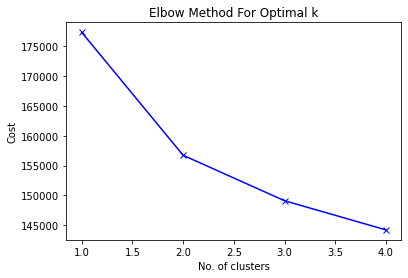

In [55]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10803, cost: 149507.0
Run 1, iteration: 2/100, moves: 2993, cost: 149507.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9443, cost: 148677.0
Run 2, iteration: 2/100, moves: 1869, cost: 148677.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8379, cost: 150254.0
Run 3, iteration: 2/100, moves: 4236, cost: 149927.0
Run 3, iteration: 3/100, moves: 17, cost: 149927.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9441, cost: 153343.0
Run 4, iteration: 2/100, moves: 4, cost: 153343.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2807, cost: 153722.0
Best run was number 2


array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [57]:
df.insert(0, "Cluster", clusters, True)
df

,Cluster,age,job,marital,education,housing,loan,duration
0,0,56,housemaid,married,"basic,4y",no,no,261
1,0,57,services,married,"high,school",no,no,149
2,0,40,"admin,",married,"basic,6y",no,no,151
3,0,56,services,married,"high,school",no,yes,307
4,0,45,services,married,"basic,9y",no,no,198
...,...,...,...,...,...,...,...,...
40193,1,37,"admin,",married,"university,degree",yes,no,281
40194,2,29,unemployed,single,"basic,4y",yes,no,112
40195,1,73,retired,married,"professional,course",yes,no,334
40196,1,56,retired,married,"university,degree",yes,no,189


## visualiser comment sont classées nos données: visualiser les clusters

In [58]:
df

,Cluster,age,job,marital,education,housing,loan,duration
0,0,56,housemaid,married,"basic,4y",no,no,261
1,0,57,services,married,"high,school",no,no,149
2,0,40,"admin,",married,"basic,6y",no,no,151
3,0,56,services,married,"high,school",no,yes,307
4,0,45,services,married,"basic,9y",no,no,198
...,...,...,...,...,...,...,...,...
40193,1,37,"admin,",married,"university,degree",yes,no,281
40194,2,29,unemployed,single,"basic,4y",yes,no,112
40195,1,73,retired,married,"professional,course",yes,no,334
40196,1,56,retired,married,"university,degree",yes,no,189


In [59]:
df['Cluster'].value_counts()

0    17782
1    14437
2     7979
Name: Cluster, dtype: int64

# CATEGORIQUES KPROTOTYPE

In [65]:
# charger les données
data = pd.read_csv("data_banque_Aut21.csv", delimiter=";", decimal = ",")
# faire une copie
df = data.copy()
df.head()

,age,job,marital,education,housing,loan,duration
0,56,housemaid,married,"basic,4y",no,no,261
1,57,services,married,"high,school",no,no,149
2,40,"admin,",married,"basic,6y",no,no,151
3,56,services,married,"high,school",no,yes,307
4,45,services,married,"basic,9y",no,no,198


In [70]:
dfMatrix = df.to_numpy()

In [66]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [67]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
catColumnsPos

[1, 2, 3, 4, 5]

In [68]:
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))

Categorical columns           : ['job', 'marital', 'education', 'housing', 'loan']


In [69]:
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns position  : [1, 2, 3, 4, 5]


In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [ ]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_